In [156]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import time
from selenium.webdriver.common.by import By


options = webdriver.ChromeOptions()
driver = webdriver.Chrome(options=options)


driver.get("https://www.espncricinfo.com/records/trophy/team-match-results/indian-premier-league-117")


In [157]:
import pandas as pd
for ele in driver.find_elements(By.TAG_NAME,"div"):
    if ele.get_attribute("class") == "ds-overflow-x-auto ds-scrollbar-hide" :
        fields=ele.find_element(By.TAG_NAME,"tr").text.split("\n")
        df = pd.DataFrame(columns = fields)

In [158]:
print(fields)

['Team 1', 'Team 2', 'Winner', 'Margin', 'Ground', 'Match Date', 'Scorecard']


In [159]:
i= 0
summary_list=[]
for ele in driver.find_elements(By.TAG_NAME,"div"):
    if ele.get_attribute("class") == "ds-overflow-x-auto ds-scrollbar-hide" :
        for ele_1 in ele.find_elements(By.TAG_NAME,"tr")[1:]:
            row=[]
            for ele_2 in ele_1.find_elements(By.TAG_NAME,"td"):
              row.append(ele_2.text)
            summary_list.append(ele_1.find_elements(By.TAG_NAME,"td")[-1].find_element(By.TAG_NAME,"a").get_attribute("href"))
            df.loc[i] = row
            i = i+1

In [160]:
print(df)

           Team 1       Team 2       Winner     Margin        Ground  \
0             RCB          KKR          KKR   140 runs     Bengaluru   
1        Kings XI  Super Kings  Super Kings    33 runs        Mohali   
2      Daredevils       Royals   Daredevils  9 wickets         Delhi   
3             KKR     Chargers          KKR  5 wickets  Eden Gardens   
4          Mumbai          RCB          RCB  5 wickets      Wankhede   
..            ...          ...          ...        ...           ...   
995  Super Giants  Super Kings    no result          -       Lucknow   
996  Punjab Kings       Mumbai       Mumbai  6 wickets        Mohali   
997     Sunrisers          KKR          KKR     5 runs     Hyderabad   
998        Royals       Titans       Titans  9 wickets        Jaipur   
999   Super Kings       Mumbai  Super Kings  6 wickets       Chennai   

       Match Date Scorecard  
0    Apr 18, 2008  Twenty20  
1    Apr 19, 2008  Twenty20  
2    Apr 19, 2008  Twenty20  
3    Apr 20, 20

In [161]:
df["Team 1"].unique()

array(['RCB', 'Kings XI', 'Daredevils', 'KKR', 'Mumbai', 'Royals',
       'Chargers', 'Super Kings', 'Kochi', 'Warriors', 'Sunrisers',
       'Guj Lions', 'Supergiants', 'Supergiant', 'Capitals',
       'Punjab Kings', 'Titans', 'Super Giants'], dtype=object)

In [317]:
bat = pd.read_csv("D:/batting_summary_14.csv")
bat.head()


,Unnamed: 0,out/not_out,match,teamInnings,battingPos,batsman,runs,balls,M,4s,6s,SR,Wicketsfall,runs_score,RR,overstaken
0,0,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,1,Sourav Ganguly (c),10,12,NaN,2,0,83.33,3,222,11.10,20.0
1,1,not_out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,2,Brendon McCullum †,158,73,NaN,10,13,216.43,3,222,11.10,20.0
2,2,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,3,Ricky Ponting,20,20,NaN,1,1,100.00,3,222,11.10,20.0
3,3,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,4,David Hussey,12,12,NaN,1,0,100.00,3,222,11.10,20.0
4,4,not_out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,5,Mohammad Hafeez,5,3,NaN,1,0,166.66,3,222,11.10,20.0


In [163]:
bat.teamInnings.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [318]:
bat.drop('Unnamed: 0', axis=1, inplace=True)


In [319]:
bat.columns

Index(['out/not_out', 'match', 'teamInnings', 'battingPos', 'batsman', 'runs',
       'balls', 'M', '4s', '6s', 'SR', 'Wicketsfall', 'runs_score', 'RR',
       'overstaken'],
      dtype='object')

In [189]:
team_name_to_acr = {"KKR":'Kolkata Knight Riders', "RCB":'Royal Challengers Bangalore', 'Super Kings':"Chennai Super Kings",
                    "Daredevils":"Delhi Daredevils", "Chargers":"Deccan Chargers", "Mumbai":"Mumbai Indians", "Guj Lions":'Gujarat Lions',
                    'Royals':'Rajasthan Royals', 'Sunrisers':'Sunrisers Hyderabad', 'Supergiant':'Rising Pune Supergiant',
                    'Supergiants':'Rising Pune Supergiants', 'Capitals':'Delhi Capitals', 'Punjab Kings':'Punjab Kings','Super Giants':'Lucknow Super Giants',
                     'Titans':'Gujarat Titans','Kings XI': 'Kings XI Punjab','Kochi':'Kochi Tuskers Kerala' ,'Warriors': 'Pune Warriors'}

In [320]:
j=0
i=0
winner = []
margin = []
ground = []
match_date = []
while i<len(df):
  while j< len(bat):
    team_1= team_name_to_acr[df["Team 1"].loc[i].strip()]
    team_2 = team_name_to_acr[df["Team 2"].loc[i].strip()]
    if (f"{team_1} vs {team_2}" == bat["match"].loc[j]) or (f"{team_2} vs {team_1}" == bat["match"].loc[j]):
                           if team_name_to_acr.get(df["Winner"].loc[i])!=None:
                              winner.append( team_name_to_acr[df["Winner"].loc[i]])
                           else:
                            winner.append(df["Winner"].loc[i])

                           margin.append(df["Margin"].loc[i])
                           ground.append(df["Ground"].loc[i])
                           match_date.append(df["Match Date"].loc[i])
                           j=j+1
    else:
                           break
  i=i+1

In [321]:
bat["Winner"] = winner
bat["Match Date"] = match_date
bat["Ground"] = ground
bat["margin"] = margin

In [322]:
bat.head()

,out/not_out,match,teamInnings,battingPos,batsman,runs,balls,M,4s,6s,SR,Wicketsfall,runs_score,RR,overstaken,Winner,Match Date,Ground,margin
0,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,1,Sourav Ganguly (c),10,12,NaN,2,0,83.33,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs
1,not_out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,2,Brendon McCullum †,158,73,NaN,10,13,216.43,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs
2,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,3,Ricky Ponting,20,20,NaN,1,1,100.00,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs
3,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,4,David Hussey,12,12,NaN,1,0,100.00,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs
4,not_out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,5,Mohammad Hafeez,5,3,NaN,1,0,166.66,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs


In [ ]:
bowl = pd.reead_csv()

In [96]:
driver.get(summary_list[552])

In [60]:
batting_summary = []
bowling_summary = []
RR = []
runs = []
M_O_M = []

In [97]:

for idx,link in enumerate(summary_list[552:951]):
    driver.get(link)
    time.sleep(2)
    match = []
    team = []
    man_of_match=""
    for element in driver.find_elements(By.TAG_NAME, 'div'):
      try:
       if element.get_attribute("class")=="ds-px-4 ds-py-2 ds-self-stretch ds-w-full ds-border-line odd:ds-border-b":
         man_of_match = element.text
      except:
        print(idx)
    print(man_of_match)
    if man_of_match!="":
     M_O_M.append(man_of_match.split("\n")[1])
    else :
        M_O_M.append("")
        
    for element in  driver.find_elements(By.TAG_NAME, 'div'):
      if element.get_attribute("class")=="ds-text-compact-xxs ds-p-2 ds-px-4 lg:ds-py-3":
         match.append(element.text.split("\n")[0])
         match.append(element.text.split("\n")[2])
    print(match)
    
    for i,ele in enumerate(driver.find_elements(By.TAG_NAME,'table')):
        body = ele.find_element(By.TAG_NAME,'tbody')
        match_info = []
        
        j=1
        if i<4 and i%2==0:
          
          for tr in body.find_elements(By.TAG_NAME,'tr'):
              if tr.get_attribute('class')!="ds-hidden" and tr.get_attribute("class")!="ds-text-tight-s" and tr.get_attribute("class")!="!ds-border-b-0":
                 match_info.append(f"{match[0]} vs {match[1]}")
                 if i==0:
                  match_info.append(match[0])
                 else :
                  match_info.append(match[1]) 
                 match_info.append(j)
                 if "TOTAL" not in tr.text:
                  for td in tr.find_elements(By.TAG_NAME,'td'):
                     if  td.text != ' ' and "Fall of wickets" not in td.text:
                        match_info.append(td.text)
                  batting_summary.append(match_info)
                  match_info = []
                  j=j+1
                 else:
                    for td in tr.find_elements(By.TAG_NAME,'td'):
                        if "TOTAL" not in td.text and "RR" in td.text and td.text!=" ":
                            if i==0:
                             RR.append((f"{match[0]} vs {match[1]}",match[0],td.text))
                            else:
                             RR.append((f"{match[0]} vs {match[1]}",match[1],td.text))
                        elif  "TOTAL" not in td.text and "RR" not in td.text and td.text!=" ":
                            if i==0:
                             runs.append((f"{match[0]} vs {match[1]}",match[0],td.text))
                            else:
                             runs.append((f"{match[0]} vs {match[1]}",match[1],td.text))
                            
                 #match_info.append(tr.text)
                 
              
        
        if i<4 and i%2==1 :
          
           for tr in body.find_elements(By.TAG_NAME,'tr'):
               if tr.get_attribute("class")!="ds-hidden":
                match_info = []
                match_info.append(f"{match[0]} vs {match[1]}")
                if i==1:
                 match_info.append(match[1])
                elif  i==3:
                 match_info.append(match[0])
                else:
                    match_info.append("NAN")
                match_info.append(j)
                for td in tr.find_elements(By.TAG_NAME,'td'):
                    if  td.text != ' ':
                        match_info.append(td.text)
                bowling_summary.append(match_info)
                j=j+1
            

PLAYER OF THE MATCH
Virat Kohli
, RCB
108* (58)
['Rising Pune Supergiants', 'Royal Challengers Bangalore']
PLAYER OF THE MATCH
Marcus Stoinis
, PBKS
52 (44) & 3/40
['Kings XI Punjab', 'Delhi Daredevils']
PLAYER OF THE MATCH
Ashish Nehra
, SRH
3/15
['Sunrisers Hyderabad', 'Mumbai Indians']
PLAYER OF THE MATCH
Praveen Kumar
, GL
2/19
['Kolkata Knight Riders', 'Gujarat Lions']
PLAYER OF THE MATCH
Shane Watson
, RCB
2/22
['Royal Challengers Bangalore', 'Kings XI Punjab']
PLAYER OF THE MATCH
Adam Zampa
, RPS
6/19
['Sunrisers Hyderabad', 'Rising Pune Supergiants']
PLAYER OF THE MATCH
Krunal Pandya
, MI
1/15
['Royal Challengers Bangalore', 'Mumbai Indians']
PLAYER OF THE MATCH
Chris Morris
, DC
1/19
['Sunrisers Hyderabad', 'Delhi Daredevils']
PLAYER OF THE MATCH
Marcus Stoinis
, PBKS
4/15
['Mumbai Indians', 'Kings XI Punjab']
PLAYER OF THE MATCH
AB de Villiers
, RCB
129* (52) & 2 catches
['Royal Challengers Bangalore', 'Gujarat Lions']
PLAYER OF THE MATCH
Yusuf Pathan
, KKR
37* (18)
['Rising 

In [63]:
print(len(batting_summary))
print(len(bowling_summary))
batting_summary[-1]


1029
696


['Mumbai Indians vs Chennai Super Kings',
 'Chennai Super Kings',
 10,
 'Mumbai Indians vs Chennai Super Kings',
 'Chennai Super Kings',
 10]

In [98]:
idx

398

In [99]:
len(M_O_M)

951

In [101]:
M_O_M[-1]="Hardik Pandya"

In [102]:
M_O_M[-1]

'Hardik Pandya'

In [141]:
current_idx = idx + current_idx

In [168]:
print(len(M_O_M))
print(len(bowling_summary[1]))

74
14


In [103]:
print(len(batting_summary))
print(batting_summary[23])

16463
['Chennai Super Kings vs Kings XI Punjab', 'Chennai Super Kings', 6, 'Jacob Oram ', 'b Pathan', '13', '10', '', '0', '1', '130.00']


In [105]:
batting_summary_new=[]
for ele in batting_summary:
    ele_1=[]
    for term in ele:
        if term!='NaN':
            ele_1.append(term)
    batting_summary_new.append(ele_1)

In [106]:
batting_summary_new = [ele for ele in batting_summary_new if (len(ele)==10) or (len(ele)==11)] #cleanig the data which doesn't correspond to batsman

In [107]:
len(batting_summary_new)

14539

In [260]:
batting_summary_new[25]

['Punjab Kings vs Kolkata Knight Riders',
 'Kolkata Knight Riders',
 3,
 'Anukul Roy ',
 'c Sikandar Raza b Arshdeep Singh',
 '4',
 '5',
 '5',
 '1',
 '0',
 '80.00']

In [108]:
batting_summary_new_1=[]
for ele in batting_summary_new:
    ele_1=ele.copy()
    if len(ele_1)!=11:
        ele_1.insert(7,"NaN")
        batting_summary_new_1.append(ele_1)
    else:
        batting_summary_new_1.append(ele_1)

In [109]:
print(len(batting_summary_new_1))

14539


In [110]:
batting_df=pd.DataFrame(columns=["match","teamInnings","battingPos","batsman","dismissal","runs","balls","M","4s","6s","SR"])
for data in batting_summary_new_1:
    print(len(data))
    print(data)
    batting_df.loc[len(batting_df)]=data
   

11
['Kolkata Knight Riders vs Royal Challengers Bangalore', 'Kolkata Knight Riders', 1, 'Sourav Ganguly (c)', 'c Kallis b Khan', '10', '12', '', '2', '0', '83.33']
11
['Kolkata Knight Riders vs Royal Challengers Bangalore', 'Kolkata Knight Riders', 2, 'Brendon McCullum †', 'not out', '158', '73', '', '10', '13', '216.43']
11
['Kolkata Knight Riders vs Royal Challengers Bangalore', 'Kolkata Knight Riders', 3, 'Ricky Ponting ', 'c Kumar b Kallis', '20', '20', '', '1', '1', '100.00']
11
['Kolkata Knight Riders vs Royal Challengers Bangalore', 'Kolkata Knight Riders', 4, 'David Hussey ', 'c White b Noffke', '12', '12', '', '1', '0', '100.00']
11
['Kolkata Knight Riders vs Royal Challengers Bangalore', 'Kolkata Knight Riders', 5, 'Mohammad Hafeez ', 'not out', '5', '3', '', '1', '0', '166.66']
11
['Kolkata Knight Riders vs Royal Challengers Bangalore', 'Royal Challengers Bangalore', 1, 'Rahul Dravid (c)', 'b Sharma', '2', '3', '', '0', '0', '66.66']
11
['Kolkata Knight Riders vs Royal Chall

In [265]:
len(bowling_summary)

909

In [266]:
len(bowling_summary[0])

14

In [111]:
bowling_df=pd.DataFrame(columns=["match","BowlingTeam","bowling_pos","bowlerName","O","M","R","W","ECON","0s","4s","6s","WD","NB"])

In [112]:
for data in bowling_summary:
    if len(data)==14:
        bowling_df.loc[len(bowling_df)]=data

In [113]:
bowling_df.head(5)

,match,BowlingTeam,bowling_pos,bowlerName,O,M,R,W,ECON,0s,4s,6s,WD,NB
0,Kolkata Knight Riders vs Royal Challengers Ban...,Royal Challengers Bangalore,1,Praveen Kumar,4,0,38,0,9.50,13,3,3,1,0
1,Kolkata Knight Riders vs Royal Challengers Ban...,Royal Challengers Bangalore,2,Zaheer Khan,4,0,38,1,9.50,8,3,2,0,0
2,Kolkata Knight Riders vs Royal Challengers Ban...,Royal Challengers Bangalore,3,Ashley Noffke,4,0,40,1,10.00,7,2,2,1,0
3,Kolkata Knight Riders vs Royal Challengers Ban...,Royal Challengers Bangalore,4,Jacques Kallis,4,0,48,1,12.00,9,5,3,1,0
4,Kolkata Knight Riders vs Royal Challengers Ban...,Royal Challengers Bangalore,5,Sunil Joshi,3,0,26,0,8.66,4,0,2,0,0


In [114]:
print(RR[0])

('Kolkata Knight Riders vs Royal Challengers Bangalore', 'Kolkata Knight Riders', '20 Ov\n (RR: 11.10)')


In [115]:
print(runs[0])

('Kolkata Knight Riders vs Royal Challengers Bangalore', 'Kolkata Knight Riders', '222/3')


In [125]:
len(runs)

3796

In [128]:
print(runs[4])

('Chennai Super Kings vs Kings XI Punjab', 'Chennai Super Kings', '240/5')


In [276]:
print(len(RR))

147


In [119]:
runs_new=[]
for element in runs:
    if len(element[2])!=0:
        runs_new.append(element)

In [129]:
print(len(runs_new))

1898


In [130]:
runs_df = pd.DataFrame(columns=["match","teamInnings","overstaken","RR","Wicketsfall","runs_score"])

# Preprocessing the data to store runs information

match_info_list  = []
for idx in range(len(RR)):
    match_info = []
    match_info.append(RR[idx][0])
    match_info.append(RR[idx][1])
    match_info.append(RR[idx][2].split("\n")[0].split()[0])
    match_info.append(RR[idx][2].split("\n")[1].split(":")[1].split(")")[0].strip())
    try:
     match_info.append(runs_new[idx][2].split("/")[1])
    except:
     match_info.append("11")

    match_info.append(runs_new[idx][2].split("/")[0])
    match_info_list.append(match_info)

In [131]:
print(match_info_list[0])

['Kolkata Knight Riders vs Royal Challengers Bangalore', 'Kolkata Knight Riders', '20', '11.10', '3', '222']


In [132]:
for element in match_info_list:
    runs_df.loc[len(runs_df)]=element

In [133]:
runs_df.head()

,match,teamInnings,overstaken,RR,Wicketsfall,runs_score
0,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,20,11.10,3,222
1,Kolkata Knight Riders vs Royal Challengers Ban...,Royal Challengers Bangalore,15.1,5.40,11,82
2,Chennai Super Kings vs Kings XI Punjab,Chennai Super Kings,20,12.00,5,240
3,Chennai Super Kings vs Kings XI Punjab,Kings XI Punjab,20,10.35,4,207
4,Rajasthan Royals vs Delhi Daredevils,Rajasthan Royals,20,6.45,8,129


In [134]:
RR = []
overstaken = []
Wicketsfall = []
runs_score = []
k = 0
for i in range(len(runs_df)):
    while k < len(batting_df) and runs_df.match.loc[i]==batting_df.match.loc[k] and runs_df.teamInnings.loc[i]==batting_df.teamInnings.loc[k]:
        overstaken.append(runs_df.overstaken.loc[i])
        RR.append(runs_df.RR.loc[i])
        Wicketsfall.append(runs_df.Wicketsfall.loc[i])
        runs_score.append(runs_df.runs_score.loc[i])
        k = k+1
    
    

In [135]:
len(batting_df)

14539

In [136]:
len(Wicketsfall)

14539

In [137]:
batting_df["Wicketsfall"] = Wicketsfall
batting_df["runs_score"] = runs_score
batting_df["RR"] = RR
batting_df["overstaken"] = overstaken

In [138]:
# extracting new feature
batting_df["out/not_out"] = batting_df["dismissal"].apply(lambda x:"not_out" if ("not out" in x or len(x)==0) else "out")

In [139]:
batting_df["IPL_Year"] = batting_df.match.apply(lambda x:"2023")

In [141]:
batting_df.drop("IPL_Year", axis=1, inplace=True)

In [142]:
# drop irrelevant feature
batting_df.drop("dismissal",axis=1, inplace=True)

In [143]:
columns = batting_df.columns.to_list()
batting_df = batting_df[columns[-1:]+columns[0:-1]]

In [144]:
batting_df.head(20)

,out/not_out,match,teamInnings,battingPos,batsman,runs,balls,M,4s,6s,SR,Wicketsfall,runs_score,RR,overstaken
0,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,1,Sourav Ganguly (c),10,12,,2,0,83.33,3,222,11.10,20
1,not_out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,2,Brendon McCullum †,158,73,,10,13,216.43,3,222,11.10,20
2,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,3,Ricky Ponting,20,20,,1,1,100.00,3,222,11.10,20
3,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,4,David Hussey,12,12,,1,0,100.00,3,222,11.10,20
4,not_out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,5,Mohammad Hafeez,5,3,,1,0,166.66,3,222,11.10,20
5,out,Kolkata Knight Riders vs Royal Challengers Ban...,Royal Challengers Bangalore,1,Rahul Dravid (c),2,3,,0,0,66.66,11,82,5.40,15.1
6,out,Kolkata Knight Riders vs Royal Challengers Ban...,Royal Challengers Bangalore,2,Wasim Jaffer,6,16,,0,0,37.50,11,82,5.40,15.1
7,out,Kolkata Knight Riders vs Royal Challengers Ban...,Royal Challengers Bangalore,3,Virat Kohli,1,5,,0,0,20.00,11,82,5.40,15.1
8,out,Kolkata Knight Riders vs Royal Challengers Ban...,Royal Challengers Bangalore,4,Jacques Kallis,8,7,,0,1,114.28,11,82,5.40,15.1
9,out,Kolkata Knight Riders vs Royal Challengers Ban...,Royal Challengers Bangalore,5,Cameron White,6,10,,0,0,60.00,11,82,5.40,15.1


In [491]:
matches = batting_df_new.match.unique()

In [492]:
print(M_O_M[0])

Rashid Khan


In [145]:
man_of_match_df = pd.DataFrame(columns=["man_of_match"])
for i in range(len(M_O_M)):
    man_of_match_df.loc[len(man_of_match_df)]=M_O_M[i]

In [146]:
len(man_of_match_df)

951

In [147]:
man_of_match_df.to_csv("D:/man_of_match_14.csv")

In [148]:
batting_df.to_csv("D:/batting_summary_14.csv")

In [149]:
bowling_df.to_csv("D:/bowling_summary_14.csv")
df.to_csv("D:/Match_results.csv")

In [150]:
runs_df.to_csv("D:/player_runs_14.csv")

In [208]:
man_of_match = pd.read_csv("D:/man_of_match_14.csv")

In [210]:
man_of_match = man_of_match["man_of_match"]

In [323]:
df_summary = df.iloc[0:951].copy()
df_summary.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,RCB,KKR,KKR,140 runs,Bengaluru,"Apr 18, 2008",Twenty20
1,Kings XI,Super Kings,Super Kings,33 runs,Mohali,"Apr 19, 2008",Twenty20
2,Daredevils,Royals,Daredevils,9 wickets,Delhi,"Apr 19, 2008",Twenty20
3,KKR,Chargers,KKR,5 wickets,Eden Gardens,"Apr 20, 2008",Twenty20
4,Mumbai,RCB,RCB,5 wickets,Wankhede,"Apr 20, 2008",Twenty20


In [324]:
man_of_match = list(man_of_match)

In [325]:
df_summary["man_of_match"]=man_of_match

In [326]:
j=0
i=0
winner = []
margin = []
ground = []
match_date = []
man_of_match_1 = []
while i<len(df):
  while j< len(bat):
    team_1= team_name_to_acr[df_summary["Team 1"].loc[i].strip()]
    team_2 = team_name_to_acr[df_summary["Team 2"].loc[i].strip()]
    if (f"{team_1} vs {team_2}" == bat["match"].loc[j]) or (f"{team_2} vs {team_1}" == bat["match"].loc[j]):
                           if team_name_to_acr.get(df["Winner"].loc[i])!=None:
                              winner.append( team_name_to_acr[df_summary["Winner"].loc[i]])
                           else:
                            winner.append(df_summary["Winner"].loc[i])

                           margin.append(df_summary["Margin"].loc[i])
                           ground.append(df_summary["Ground"].loc[i])
                           match_date.append(df_summary["Match Date"].loc[i])
                           man_of_match_1.append(df_summary["man_of_match"].loc[i])
                           j=j+1
    else:
                           break
  i=i+1

In [327]:
bat["man_of_match"] = man_of_match_1

In [328]:
bat.head()

,out/not_out,match,teamInnings,battingPos,batsman,runs,balls,M,4s,6s,SR,Wicketsfall,runs_score,RR,overstaken,Winner,Match Date,Ground,margin,man_of_match
0,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,1,Sourav Ganguly (c),10,12,NaN,2,0,83.33,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,Brendon McCullum
1,not_out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,2,Brendon McCullum †,158,73,NaN,10,13,216.43,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,Brendon McCullum
2,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,3,Ricky Ponting,20,20,NaN,1,1,100.00,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,Brendon McCullum
3,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,4,David Hussey,12,12,NaN,1,0,100.00,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,Brendon McCullum
4,not_out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,5,Mohammad Hafeez,5,3,NaN,1,0,166.66,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,Brendon McCullum


In [329]:
import re
def replace(str):
   str =  re.sub(r"†", " ", str)
   str =  re.sub(r"\(\w\)", " ", str)
   return str
bat["batsman"] = bat["batsman"].apply(replace)
bat.head(20)

,out/not_out,match,teamInnings,battingPos,batsman,runs,balls,M,4s,6s,SR,Wicketsfall,runs_score,RR,overstaken,Winner,Match Date,Ground,margin,man_of_match
0,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,1,Sourav Ganguly,10,12,NaN,2,0,83.33,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,Brendon McCullum
1,not_out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,2,Brendon McCullum,158,73,NaN,10,13,216.43,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,Brendon McCullum
2,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,3,Ricky Ponting,20,20,NaN,1,1,100.00,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,Brendon McCullum
3,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,4,David Hussey,12,12,NaN,1,0,100.00,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,Brendon McCullum
4,not_out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,5,Mohammad Hafeez,5,3,NaN,1,0,166.66,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,Brendon McCullum
5,out,Kolkata Knight Riders vs Royal Challengers Ban...,Royal Challengers Bangalore,1,Rahul Dravid,2,3,NaN,0,0,66.66,11,82,5.40,15.1,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,Brendon McCullum
6,out,Kolkata Knight Riders vs Royal Challengers Ban...,Royal Challengers Bangalore,2,Wasim Jaffer,6,16,NaN,0,0,37.50,11,82,5.40,15.1,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,Brendon McCullum
7,out,Kolkata Knight Riders vs Royal Challengers Ban...,Royal Challengers Bangalore,3,Virat Kohli,1,5,NaN,0,0,20.00,11,82,5.40,15.1,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,Brendon McCullum
8,out,Kolkata Knight Riders vs Royal Challengers Ban...,Royal Challengers Bangalore,4,Jacques Kallis,8,7,NaN,0,1,114.28,11,82,5.40,15.1,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,Brendon McCullum
9,out,Kolkata Knight Riders vs Royal Challengers Ban...,Royal Challengers Bangalore,5,Cameron White,6,10,NaN,0,0,60.00,11,82,5.40,15.1,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,Brendon McCullum


In [330]:
label=[]
for i in range(len(bat)):
    if bat["batsman"].loc[i].strip()==bat["man_of_match"].astype(str).loc[i].strip():
        label.append(1)
    else:
        label.append(0)

In [331]:
bat["man_of_match"]=label
bat.head()

,out/not_out,match,teamInnings,battingPos,batsman,runs,balls,M,4s,6s,SR,Wicketsfall,runs_score,RR,overstaken,Winner,Match Date,Ground,margin,man_of_match
0,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,1,Sourav Ganguly,10,12,NaN,2,0,83.33,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,0
1,not_out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,2,Brendon McCullum,158,73,NaN,10,13,216.43,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,1
2,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,3,Ricky Ponting,20,20,NaN,1,1,100.00,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,0
3,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,4,David Hussey,12,12,NaN,1,0,100.00,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,0
4,not_out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,5,Mohammad Hafeez,5,3,NaN,1,0,166.66,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,0


In [484]:
import numpy as np
def process(input):
    if input=="-" or input=="NaN":
        return np.nan
    elif "Mins" in input:
        return float(input.split(",")[0].strip())
    else:
        return float(input)


In [ ]:
bat["runs"]= bat["runs"].apply(process)

In [385]:
bat_new["4s"] = bat_new["4s"].apply(process)
bat_new["6s"] = bat_new["6s"].apply(process)

In [507]:
avg_value_4 = np.mean(np.array(bat_new[np.isnan(np.array(bat_new["4s"]))==False]["4s"]))
avg_value_6 = np.mean(np.array(bat_new[np.isnan(np.array(bat_new["6s"]))==False]["6s"]))
for i in range(len(bat_new)):
    if np.isnan(bat_new["4s"].loc[i]):
        bat_new["4s"].loc[i]=avg_value_4
for i in range(len(bat_new)):
    if np.isnan(bat_new["6s"].loc[i]):
        bat_new["6s"].loc[i]=avg_value_6

In [333]:
bat["M"] = bat["M"].apply(process)

In [366]:
bat["balls"] = bat["balls"].apply(process)

In [481]:
bat_new["SR"] = bat_new["SR"].apply(process)

In [ ]:
bat_new["RR"] = bat_new["RR"].apply(process)

In [ ]:
avg_value_rr = np.mean(np.array(bat_new[np.isnan(np.array(bat_new["RR"]))==False]["RR"]))

In [490]:
for i in range(len(bat_new)):
    if np.isnan(bat_new["RR"].loc[i]):
        bat_new["RR"].loc[i]=avg_value_rr

In [486]:
avg_value_sr = np.mean(np.array(bat_new[np.isnan(np.array(bat_new["SR"]))==False]["SR"]))

In [488]:
for i in range(len(bat_new)):
    if np.isnan(bat_new["SR"].loc[i]):
        bat_new["SR"].loc[i]=avg_value_sr

In [375]:
bat_new  = bat.copy()

In [370]:
avg_value = np.mean(np.array(bat_new[np.isnan(np.array(bat_new["M"]))==False]["M"]))
    

In [371]:
avg_value_runs = np.mean(np.array(bat_new[np.isnan(np.array(bat_new["runs"]))==False]["runs"]))

In [563]:
avg_value_balls = np.mean(np.array(bat[np.isnan(np.array(bat["balls"]))==False]["balls"]))

In [377]:
for i in range(len(bat_new)):
    if np.isnan(bat_new["M"].loc[i]):
        bat_new["M"].loc[i]=avg_value

In [379]:
for i in range(len(bat_new)):
    if np.isnan(bat_new["runs"].loc[i]):
        bat_new["runs"].loc[i]=avg_value_runs

In [564]:
for i in range(len(bat_new)):
    if np.isnan(bat_new["balls"].loc[i]):
        bat_new["balls"].loc[i]=avg_value_balls

C:\Users\91885\AppData\Local\Temp\ipykernel_34008\3503318468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bat_new["balls"].loc[i]=avg_value_balls


In [565]:
bat_new.head(20)

,out/not_out,match,teamInnings,battingPos,batsman,runs,balls,M,4s,6s,...,Winner,Match Date,Ground,margin,man_of_match,run_rate_player,boundary,boundary_percent,rbtw,player_run_perc
0,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,1,Sourav Ganguly,10.0,12.0,24.641274,2.0,0.0,...,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,0,0.833333,2.0,80.000000,20.000000,4.504505
1,not_out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,2,Brendon McCullum,158.0,73.0,24.641274,10.0,13.0,...,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,1,2.164384,23.0,74.683544,25.316456,71.171171
2,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,3,Ricky Ponting,20.0,20.0,24.641274,1.0,1.0,...,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,0,1.000000,2.0,50.000000,50.000000,9.009009
3,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,4,David Hussey,12.0,12.0,24.641274,1.0,0.0,...,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,0,1.000000,1.0,33.333333,66.666667,5.405405
4,not_out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,5,Mohammad Hafeez,5.0,3.0,24.641274,1.0,0.0,...,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,0,1.666667,1.0,80.000000,20.000000,2.252252
5,out,Kolkata Knight Riders vs Royal Challengers Ban...,Royal Challengers Bangalore,1,Rahul Dravid,2.0,3.0,24.641274,0.0,0.0,...,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,0,0.666667,0.0,0.000000,100.000000,2.439024
6,out,Kolkata Knight Riders vs Royal Challengers Ban...,Royal Challengers Bangalore,2,Wasim Jaffer,6.0,16.0,24.641274,0.0,0.0,...,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,0,0.375000,0.0,0.000000,100.000000,7.317073
7,out,Kolkata Knight Riders vs Royal Challengers Ban...,Royal Challengers Bangalore,3,Virat Kohli,1.0,5.0,24.641274,0.0,0.0,...,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,0,0.200000,0.0,0.000000,100.000000,1.219512
8,out,Kolkata Knight Riders vs Royal Challengers Ban...,Royal Challengers Bangalore,4,Jacques Kallis,8.0,7.0,24.641274,0.0,1.0,...,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,0,1.142857,1.0,75.000000,25.000000,9.756098
9,out,Kolkata Knight Riders vs Royal Challengers Ban...,Royal Challengers Bangalore,5,Cameron White,6.0,10.0,24.641274,0.0,0.0,...,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,0,0.600000,0.0,0.000000,100.000000,7.317073


In [316]:
bat.columns

Index(['out/not_out', 'match', 'teamInnings', 'battingPos', 'batsman', 'runs',
       'balls', 'M', '4s', '6s', 'SR', 'Wicketsfall', 'runs_score', 'RR',
       'overstaken', 'Winner', 'Match Date', 'Ground', 'margin',
       'man_of_match', 'run_rate_player'],
      dtype='object')

In [382]:
def next_process(input):
    if input["balls"]!=0:
      return input["runs"]/input["balls"]
    else:
        return 0
bat_new["run_rate_player"] = bat_new.apply(next_process,axis=1)

In [383]:
bat_new.head()

,out/not_out,match,teamInnings,battingPos,batsman,runs,balls,M,4s,6s,...,Wicketsfall,runs_score,RR,overstaken,Winner,Match Date,Ground,margin,man_of_match,run_rate_player
0,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,1,Sourav Ganguly,10.0,12.0,24.641274,2,0,...,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,0,0.833333
1,not_out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,2,Brendon McCullum,158.0,73.0,24.641274,10,13,...,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,1,2.164384
2,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,3,Ricky Ponting,20.0,20.0,24.641274,1,1,...,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,0,1.000000
3,out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,4,David Hussey,12.0,12.0,24.641274,1,0,...,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,0,1.000000
4,not_out,Kolkata Knight Riders vs Royal Challengers Ban...,Kolkata Knight Riders,5,Mohammad Hafeez,5.0,3.0,24.641274,1,0,...,3,222,11.10,20.0,Kolkata Knight Riders,"Apr 18, 2008",Bengaluru,140 runs,0,1.666667


In [384]:
len(bat_new["batsman"].unique())

710

In [517]:
def process_new_feature(input):
    if input["runs"]!=0:
      return ((input["runs"]-(input["4s"]*4+input["6s"]*6))/input["runs"])*100
    else:
        return 0

In [535]:
def process(input):
    return input["4s"]+input["6s"]

In [536]:
bat_new["boundary"] = bat_new.apply(process, axis=1)

In [513]:
bat_new["boundary_percent"] = bat_new.apply(process_new_feature, axis=1)

In [518]:
bat_new["rbtw"] = bat_new.apply(process_new_feature, axis=1)

In [399]:
bat_new["player_run_perc"]=bat_new.apply(process_new_feature, axis=1)

In [519]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
match_ohe = ohe.fit_transform(np.array(bat_new["match"]).reshape(-1,1))
match_ohe_features = ohe.get_feature_names_out()

In [520]:
Innings_ohe = ohe.fit_transform(np.array(bat_new["teamInnings"]).reshape(-1,1))
Innings_ohe_features = ohe.get_feature_names_out()

In [521]:
Innings_ohe_features 

array(['x0_Chennai Super Kings', 'x0_Deccan Chargers',
       'x0_Delhi Capitals', 'x0_Delhi Daredevils', 'x0_Gujarat Lions',
       'x0_Gujarat Titans', 'x0_Kings XI Punjab',
       'x0_Kochi Tuskers Kerala', 'x0_Kolkata Knight Riders',
       'x0_Lucknow Super Giants', 'x0_Mumbai Indians', 'x0_Pune Warriors',
       'x0_Punjab Kings', 'x0_Rajasthan Royals',
       'x0_Rising Pune Supergiant', 'x0_Rising Pune Supergiants',
       'x0_Royal Challengers Bangalore', 'x0_Sunrisers Hyderabad'],
      dtype=object)

In [522]:
batsman_ohe = ohe.fit_transform(np.array(bat_new["batsman"]).reshape(-1,1))
batsman_ohe_features = ohe.get_feature_names_out()

In [523]:
out_ohe = ohe.fit_transform(np.array(bat_new["out/not_out"]).reshape(-1,1))
out_ohe_features = ohe.get_feature_names_out()

In [524]:
winner_ohe = ohe.fit_transform(np.array(bat_new["Winner"]).reshape(-1,1))
winner_ohe_features = ohe.get_feature_names_out()

In [525]:
bat_new.columns

Index(['out/not_out', 'match', 'teamInnings', 'battingPos', 'batsman', 'runs',
       'balls', 'M', '4s', '6s', 'SR', 'Wicketsfall', 'runs_score', 'RR',
       'overstaken', 'Winner', 'Match Date', 'Ground', 'margin',
       'man_of_match', 'run_rate_player', 'boundary', 'boundary_percent',
       'rbtw', 'player_run_perc'],
      dtype='object')

In [526]:
batsman_ohe_data = pd.DataFrame(columns=batsman_ohe_features, data=batsman_ohe.toarray())
Innings_ohe_data = pd.DataFrame(columns=Innings_ohe_features, data=Innings_ohe.toarray())
match_ohe_data = pd.DataFrame(columns=match_ohe_features, data=match_ohe.toarray())
out_ohe_data = pd.DataFrame(columns=out_ohe_features, data=out_ohe.toarray())
winner_ohe_data = pd.DataFrame(columns=winner_ohe_features, data=winner_ohe.toarray())

In [527]:
features_ohe = pd.concat([batsman_ohe_data, Innings_ohe_data, match_ohe_data, out_ohe_data, winner_ohe_data], axis=1 )

In [621]:
bat_new_features = bat_new.drop(["M", "Wicketsfall", "Ground", "overstaken","Match Date","margin", "run_rate_player","match", "teamInnings","batsman","out/not_out", "Winner","4s", "6s"],axis=1)

In [622]:
bat_new_features = pd.concat([bat_new_features, features_ohe], axis=1)

In [623]:
y_bat = bat_new_features["man_of_match"]
bat_new_features = bat_new_features.drop(["man_of_match"], axis=1)

In [624]:
#logistic regression model apply


In [651]:
bat_new_features.to_csv("D:/batting_new_features.csv")
y_bat.to_csv("D:/batting_labels.csv")

In [625]:
bat_new_features["RR"]

0        11.10
1        11.10
2        11.10
3        11.10
4        11.10
         ...  
14534     7.32
14535     7.32
14536     7.32
14537     7.32
14538     7.32
Name: RR, Length: 14539, dtype: float64

In [626]:
X_train.head()

,battingPos,runs,balls,SR,runs_score,RR,boundary,boundary_percent,rbtw,player_run_perc,...,x0_Mumbai Indians,x0_Pune Warriors,x0_Punjab Kings,x0_Rajasthan Royals,x0_Rising Pune Supergiant,x0_Rising Pune Supergiants,x0_Royal Challengers Bangalore,x0_Sunrisers Hyderabad,x0_no result,x0_tied
13496,3,5.0,4.0,125.00,170,8.50,1.0,80.000000,20.000000,2.941176,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3118,4,2.0,1.0,200.00,111,7.83,0.0,0.000000,100.000000,1.801802,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12129,4,9.0,12.0,75.00,154,7.70,0.0,0.000000,100.000000,5.844156,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11441,4,70.0,43.0,162.79,175,8.75,9.0,62.857143,37.142857,40.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11934,9,5.0,5.0,100.00,132,6.60,0.0,0.000000,100.000000,3.787879,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [627]:
X_train.columns

Index(['battingPos', 'runs', 'balls', 'SR', 'runs_score', 'RR', 'boundary',
       'boundary_percent', 'rbtw', 'player_run_perc',
       ...
       'x0_Mumbai Indians', 'x0_Pune Warriors', 'x0_Punjab Kings',
       'x0_Rajasthan Royals', 'x0_Rising Pune Supergiant',
       'x0_Rising Pune Supergiants', 'x0_Royal Challengers Bangalore',
       'x0_Sunrisers Hyderabad', 'x0_no result', 'x0_tied'],
      dtype='object', length=939)

In [628]:
type(X_train["battingPos"].loc[3118])

numpy.int64

In [654]:
len(X_test["runs_score"])

437

In [699]:
logistic = []
svm = []

In [700]:
for epoch in range(10): 
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(bat_new_features, y_bat, test_size=0.20, random_state=epoch*10)
 from sklearn.preprocessing import Normalizer
 runs_score = np.array(X_train["runs_score"]).reshape(1,-1)
 transformer = Normalizer().fit(runs_score)
 X_train["runs_score"] = transformer.transform(runs_score).reshape(-1,1)
 X_test["runs_score"] = transformer.fit_transform(np.array(X_test["runs_score"]).reshape(1,-1)).reshape(-1,1)
 from sklearn.linear_model import LogisticRegression
 clf = LogisticRegression(random_state=0, max_iter=5000).fit(X_train, y_train)
 y_pred = clf.predict(X_test)
 from sklearn.metrics import accuracy_score
 logistic.append(accuracy_score(y_test, y_pred))
 from sklearn.svm import SVC
 clf_svm = SVC(gamma='auto')
 clf_svm.fit(X_train, y_train)
 y_pred_svm = clf_svm.predict(X_test)
 svm.append(accuracy_score(y_test, y_pred_svm))

In [701]:
logistic

[0.9549518569463549,
 0.9542640990371389,
 0.951856946354883,
 0.953232462173315,
 0.9577028885832187,
 0.9566712517193948,
 0.9556396148555708,
 0.9611416781292985,
 0.9566712517193948,
 0.9563273727647867]

In [709]:
svm

[0.9549518569463549,
 0.9549518569463549,
 0.9563273727647867,
 0.953920220082531,
 0.9583906464924347,
 0.9577028885832187,
 0.9556396148555708,
 0.9580467675378267,
 0.9566712517193948,
 0.9563273727647867]

In [743]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [755]:
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [751]:
inputs = tf.keras.layers.Input(shape=(939,))
dense_layer_1 = tf.keras.layers.Dense(512, activation=tf.nn.relu)(inputs)
dense_layer_2 = tf.keras.layers.Dense(128, activation=tf.nn.relu)(dense_layer_1)
output_layer = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(dense_layer_1)
model = tf.keras.Model(inputs=inputs, outputs=output_layer)

In [763]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy']) 

In [764]:
history = model.fit(X_train, y_train_new, batch_size = 64,epochs=10,    
          validation_split=0.2) 

Epoch 1/10
146/146 [==============================] - 3s 15ms/step - loss: 0.1380 - accuracy: 0.9536 - val_loss: 0.1552 - val_accuracy: 0.9557
Epoch 2/10
146/146 [==============================] - 2s 15ms/step - loss: 0.1236 - accuracy: 0.9548 - val_loss: 0.1546 - val_accuracy: 0.9476
Epoch 3/10
146/146 [==============================] - 2s 14ms/step - loss: 0.1080 - accuracy: 0.9582 - val_loss: 0.1509 - val_accuracy: 0.9527
Epoch 4/10
146/146 [==============================] - 2s 14ms/step - loss: 0.1169 - accuracy: 0.9568 - val_loss: 0.1656 - val_accuracy: 0.9334
Epoch 5/10
146/146 [==============================] - 2s 14ms/step - loss: 0.1059 - accuracy: 0.9589 - val_loss: 0.1536 - val_accuracy: 0.9493
Epoch 6/10
146/146 [==============================] - 2s 15ms/step - loss: 0.0956 - accuracy: 0.9607 - val_loss: 0.1549 - val_accuracy: 0.9506
Epoch 7/10
146/146 [==============================] - 2s 14ms/step - loss: 0.0999 - accuracy: 0.9611 - val_loss: 0.1555 - val_accuracy: 0.9506

In [784]:
train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

Text(0.5, 1.0, 'train accuracy vs val accuracy for DL model')

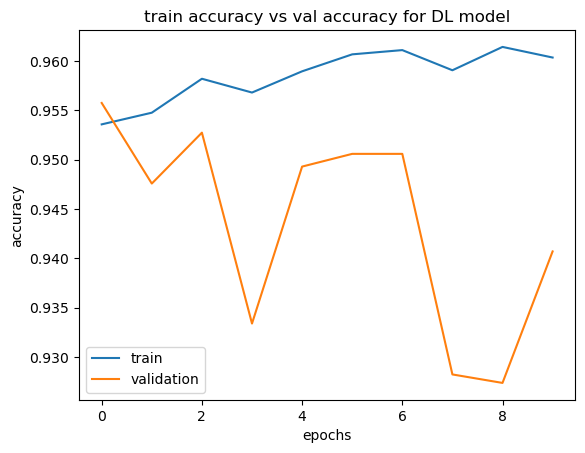

In [788]:
plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train", "validation"])
plt.title("train accuracy vs val accuracy for DL model")

In [757]:
model.evaluate(X_test, y_test_new)sb

91/91 [==============================] - 0s 4ms/step - loss: 0.2244 - accuracy: 0.9491


[0.22437098622322083, 0.9491059184074402]

In [645]:
len(y_test)

437

In [762]:
from scipy.stats import spearmanr
corr, _ = spearmanr(bat_new["6s"], bat_new["boundary"])
corr

0.7084805660866251

In [765]:
from scipy.stats import spearmanr
corr, _ = spearmanr(bat_new["RR"], bat_new["boundary"])
corr

0.27984641551796097

In [766]:
from scipy.stats import spearmanr
corr, _ = spearmanr(bat_new["SR"], bat_new["RR"])
corr

0.3481686433442531

Text(0.5, 1.0, 'Feature description')

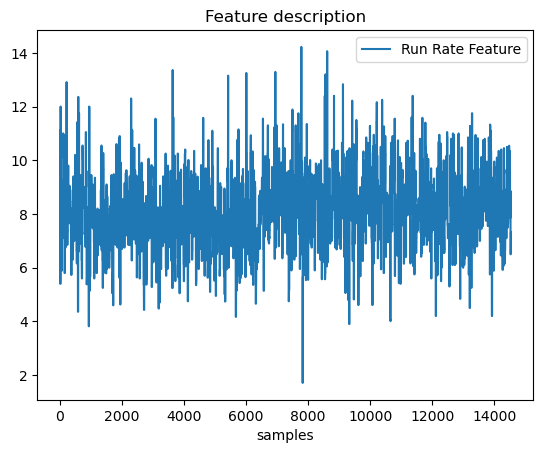

In [792]:
import matplotlib.pyplot as plt
plt.plot(bat_new["RR"])
plt.xlabel("samples")
#plt.plot(bat_new["SR"])
plt.legend(["Run Rate Feature"])
plt.title("Feature description")

Text(0.5, 1.0, 'Feature description')

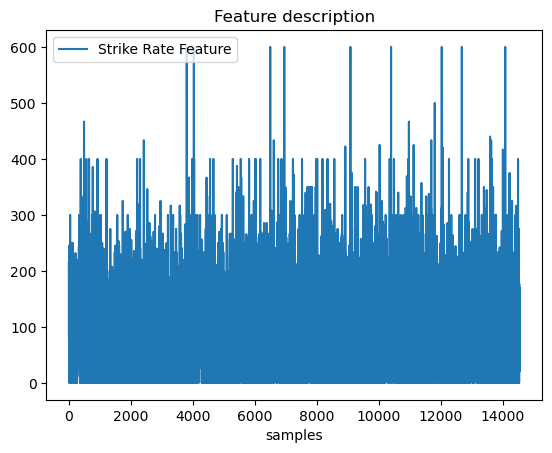

In [793]:
plt.plot(bat_new["SR"])
plt.xlabel("samples")
#plt.plot(bat_new["SR"])
plt.legend(["Strike Rate Feature"])
plt.title("Feature description")

In [761]:
from scipy.stats import spearmanr
corr, _ = spearmanr(bat_new["4s"], bat_new["boundary"])
corr

0.9290418457309386

In [801]:
from scipy.stats import spearmanr
corr, _ = spearmanr(bat_new["4s"], bat_new["SR"])
corr

0.6324470424573555

In [802]:
from scipy.stats import spearmanr
corr, _ = spearmanr(bat_new["6s"], bat_new["SR"])
corr

0.6399087389845705

Text(0.5, 1.0, 'Feature description')

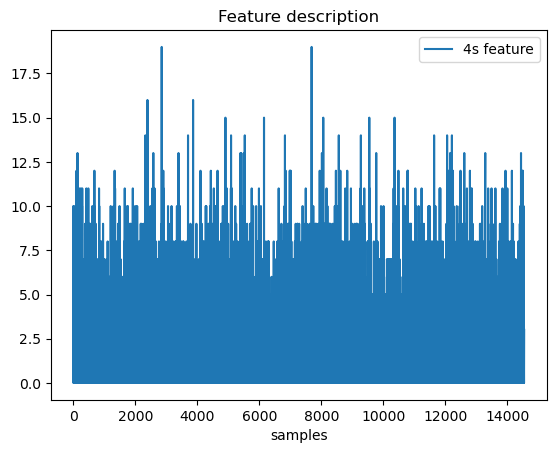

In [797]:
import matplotlib.pyplot as plt
#plt.plot(bat_new["boundary"])
plt.plot(bat_new["4s"])
plt.xlabel("samples")
plt.legend(["4s feature"])
plt.title("Feature description")

Text(0.5, 1.0, 'Feature Description')

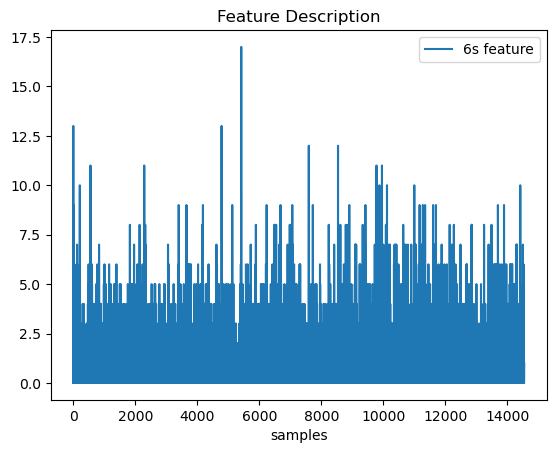

In [799]:
plt.plot(bat_new["6s"])
plt.xlabel("samples")
#plt.plot(bat_new["4s"])
plt.legend(["6s feature"])
plt.title("Feature Description")

Text(0.5, 1.0, 'Feature Description')

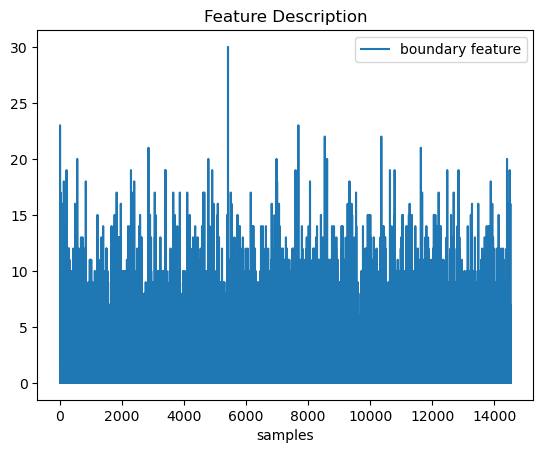

In [800]:
plt.plot(bat_new["boundary"])
#plt.plot(bat_new["6s"])
plt.xlabel("samples")
plt.legend(["boundary feature"])
plt.title("Feature Description")

In [544]:
import random
import math

In [410]:
#using z test for proportion
avg_score = np.sum(np.array(runs_df.runs_score, dtype = int))/len(runs_df.runs_score)
variance = np.sum((np.array(runs_df.runs_score, dtype = int) - avg_score)**2)/len(runs_df.runs_score)
print(avg_score)
print(variance)

174.7482993197279
1014.1475311212918


In [420]:
z_score_list = []

for i in range(10):
 sample = random.sample(list(np.array(runs_df.runs_score, dtype = int)), 10)
 sample_mean = np.sum(sample)/len(sample)
 z_score = (sample_mean - avg_score)/(math.sqrt(variance)/math.sqrt(len(runs_df.runs_score)))
 if z_score < 1.645 :
    print("Not able to reject Null hypothesis")
 z_score_list.append(z_score)

Not able to reject Null hypothesis
Not able to reject Null hypothesis
Not able to reject Null hypothesis
Not able to reject Null hypothesis
Not able to reject Null hypothesis
Not able to reject Null hypothesis
Not able to reject Null hypothesis


In [406]:
if z_score < 1.645 :
    print("Not able to reject Null hypothesis")

Not able to reject Null hyporthesis


In [421]:
print(z_score_list)

[-7.823191870461636, -5.729220266386873, 0.01968359207293949, -0.1326052518597727, -2.2646490669177113, 4.2076268002224655, -1.6554936911868732, 1.809077508282278, -8.089697347343874, 8.014847898540216]


In [422]:
sample = random.sample(list(np.array(runs_df.runs_score, dtype = int)), 40)
sample_mean = np.sum(sample)/len(sample)
z_score = (sample_mean - avg_score)/(math.sqrt(variance)/math.sqrt(len(runs_df.runs_score)))

In [423]:
print(z_score)

-1.6840478494242628


In [501]:
players =  batting_df['batsman'].unique()

In [514]:
run_rate_per_player=[]
for i in range(len(players)):
    runs=np.sum(np.array(batting_df[batting_df['batsman']==players[i]]['runs'],dtype='float'))
    balls=np.sum(np.array(batting_df[batting_df['batsman']==players[i]]['balls'],dtype='float'))
    run_rate = runs/balls
    run_rate_per_player.append(run_rate)

In [516]:
print(len(run_rate_per_player))

193


In [817]:
matches = bat_new["match"]

In [824]:
i,j=0,0
match_indices = []
while i<len(matches)-1:
    start_idx = j
    if matches.loc[i+1]==matches.loc[i]:
        i=i+1
    else:
        end_idx=i
        match_indices.append(tuple([start_idx, end_idx]))
        j=i+1
        i=i+1

In [842]:
avg_score = np.mean(np.array(bat_new["RR"]))
var_score = np.var(np.array(bat_new["RR"]))
print(avg_score)
print(var_score)

7.952935552651489
2.112695364922817


In [827]:
len(match_indices)

946

In [846]:
z_score_list = []
for i in range(10):
 lis=[]
 for i in range(len(match_indices)):
    num = random.sample(range(match_indices[i][0], match_indices[i][1]+ 1), 1)
    lis.append(bat_new["RR"].loc[num])
 players = random.sample(list(np.array(lis).squeeze()), 20)
 sample_mean = np.mean(players)
 z_score = (sample_mean - avg_score)/(math.sqrt(var_score)/math.sqrt(len(bat_new["RR"])))
 if z_score < 1.645 :
    print("Not able to reject Null hypothesis")
 else: print("reject the null hypothesis")
 z_score_list.append(z_score)

Not able to reject Null hypothesis
reject the null hypothesis
reject the null hypothesis
reject the null hypothesis
reject the null hypothesis
reject the null hypothesis
Not able to reject Null hypothesis
Not able to reject Null hypothesis
Not able to reject Null hypothesis
Not able to reject Null hypothesis


In [847]:
for i in range(len(match_indices)):
    num = random.sample(range(match_indices[i][0], match_indices[i][1]+ 1), 1)
    lis.append(bat_new["RR"].loc[num])

sample_mean = np.mean(np.array(lis).squeeze())
z_score = (sample_mean - avg_score)/(math.sqrt(var_score)/math.sqrt(len(bat_new["RR"])))
if z_score < 1.645 :
    print("Not able to reject Null hypothesis")
else: print("reject the null hypothesis")

reject the null hypothesis


In [849]:
z_score_list

[0.17125869867173232,
 26.426894701534795,
 35.96685723022142,
 46.46081601177624,
 27.422369052354288,
 31.445744553582834,
 -29.983318511567806,
 0.2542148945731604,
 -3.437335823048788,
 -15.051203249275831]

Text(0.5, 1.0, 'z_score_plot for Run Rate hypothesis')

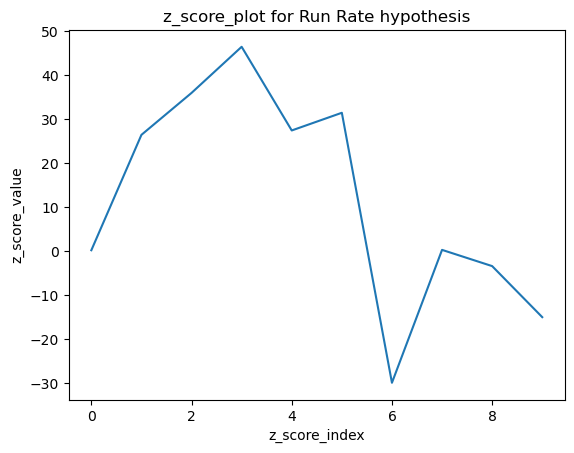

In [852]:
plt.plot(z_score_list)
plt.ylabel("z_score_value")
plt.xlabel("z_score_index")
plt.title("z_score_plot for Run Rate hypothesis")